In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import  linear_model
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df_train=pd.read_csv("dummiesTrain.csv")
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_train.head()

FileNotFoundError: File b'dummiesTrain.csv' does not exist

In [44]:
df_train.columns.tolist()

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_150',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',

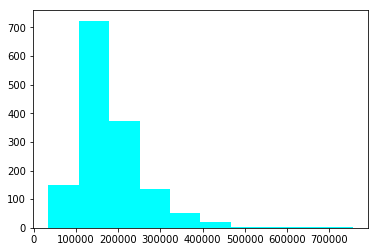

In [13]:
plt.hist(df_train.SalePrice,color="cyan")
plt.show()

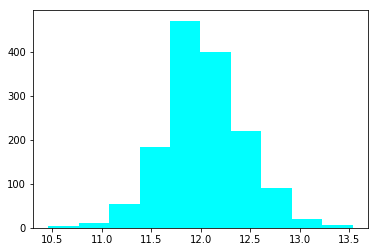

The skew is: 0.12133506220520406


In [14]:
target=np.log(df_train.SalePrice)
plt.hist(target,color="cyan")
plt.show()
print("The skew is:", target.skew())

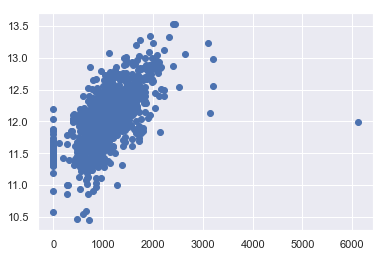

In [87]:
plt.scatter(x=df_train['TotalBsmtSF'],y=target)
#plt.ylabel('Sale Price')
#plt.xlabel('Overall Qual')
plt.show()

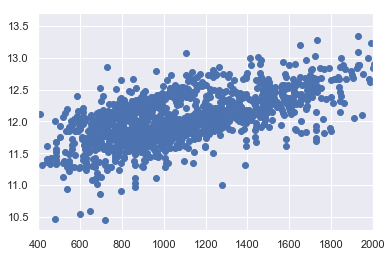

In [88]:
plt.scatter(x=df_train['TotalBsmtSF'],y=target)
plt.xlim(400,2000)
plt.show()

In [15]:
corr_matrix = df_train.corr()
corr_matrix["SalePrice"].sort_values(ascending = False)[:15]


SalePrice           1.000000
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
Foundation_PConc    0.497734
MasVnrArea          0.472614
Fireplaces          0.466929
ExterQual_Gd        0.452466
BsmtFinType1_GLQ    0.434597
Name: SalePrice, dtype: float64

In [20]:
s = corr_matrix.unstack()
s[(abs(s)>0.6) & (abs(s) < 1)].sort_values(ascending=False)

SaleType_New           SaleCondition_Partial    0.986819
SaleCondition_Partial  SaleType_New             0.986819
BsmtCond_NoBsmt        BsmtExposure_NoBsmt      0.986408
BsmtFinType1_NoBsmt    BsmtExposure_NoBsmt      0.986408
BsmtExposure_NoBsmt    BsmtFinType1_NoBsmt      0.986408
                       BsmtCond_NoBsmt          0.986408
                       BsmtQual_NoBsmt          0.986408
BsmtQual_NoBsmt        BsmtExposure_NoBsmt      0.986408
                       BsmtFinType2_NoBsmt      0.986408
BsmtCond_NoBsmt        BsmtFinType2_NoBsmt      0.986408
BsmtFinType2_NoBsmt    BsmtCond_NoBsmt          0.986408
BsmtFinType1_NoBsmt    BsmtFinType2_NoBsmt      0.986408
BsmtFinType2_NoBsmt    BsmtFinType1_NoBsmt      0.986408
                       BsmtQual_NoBsmt          0.986408
MSSubClass_190         BldgType_2fmCon          0.983395
BldgType_2fmCon        MSSubClass_190           0.983395
Exterior1st_VinylSd    Exterior2nd_VinylSd      0.977525
Exterior2nd_VinylSd    Exterior

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


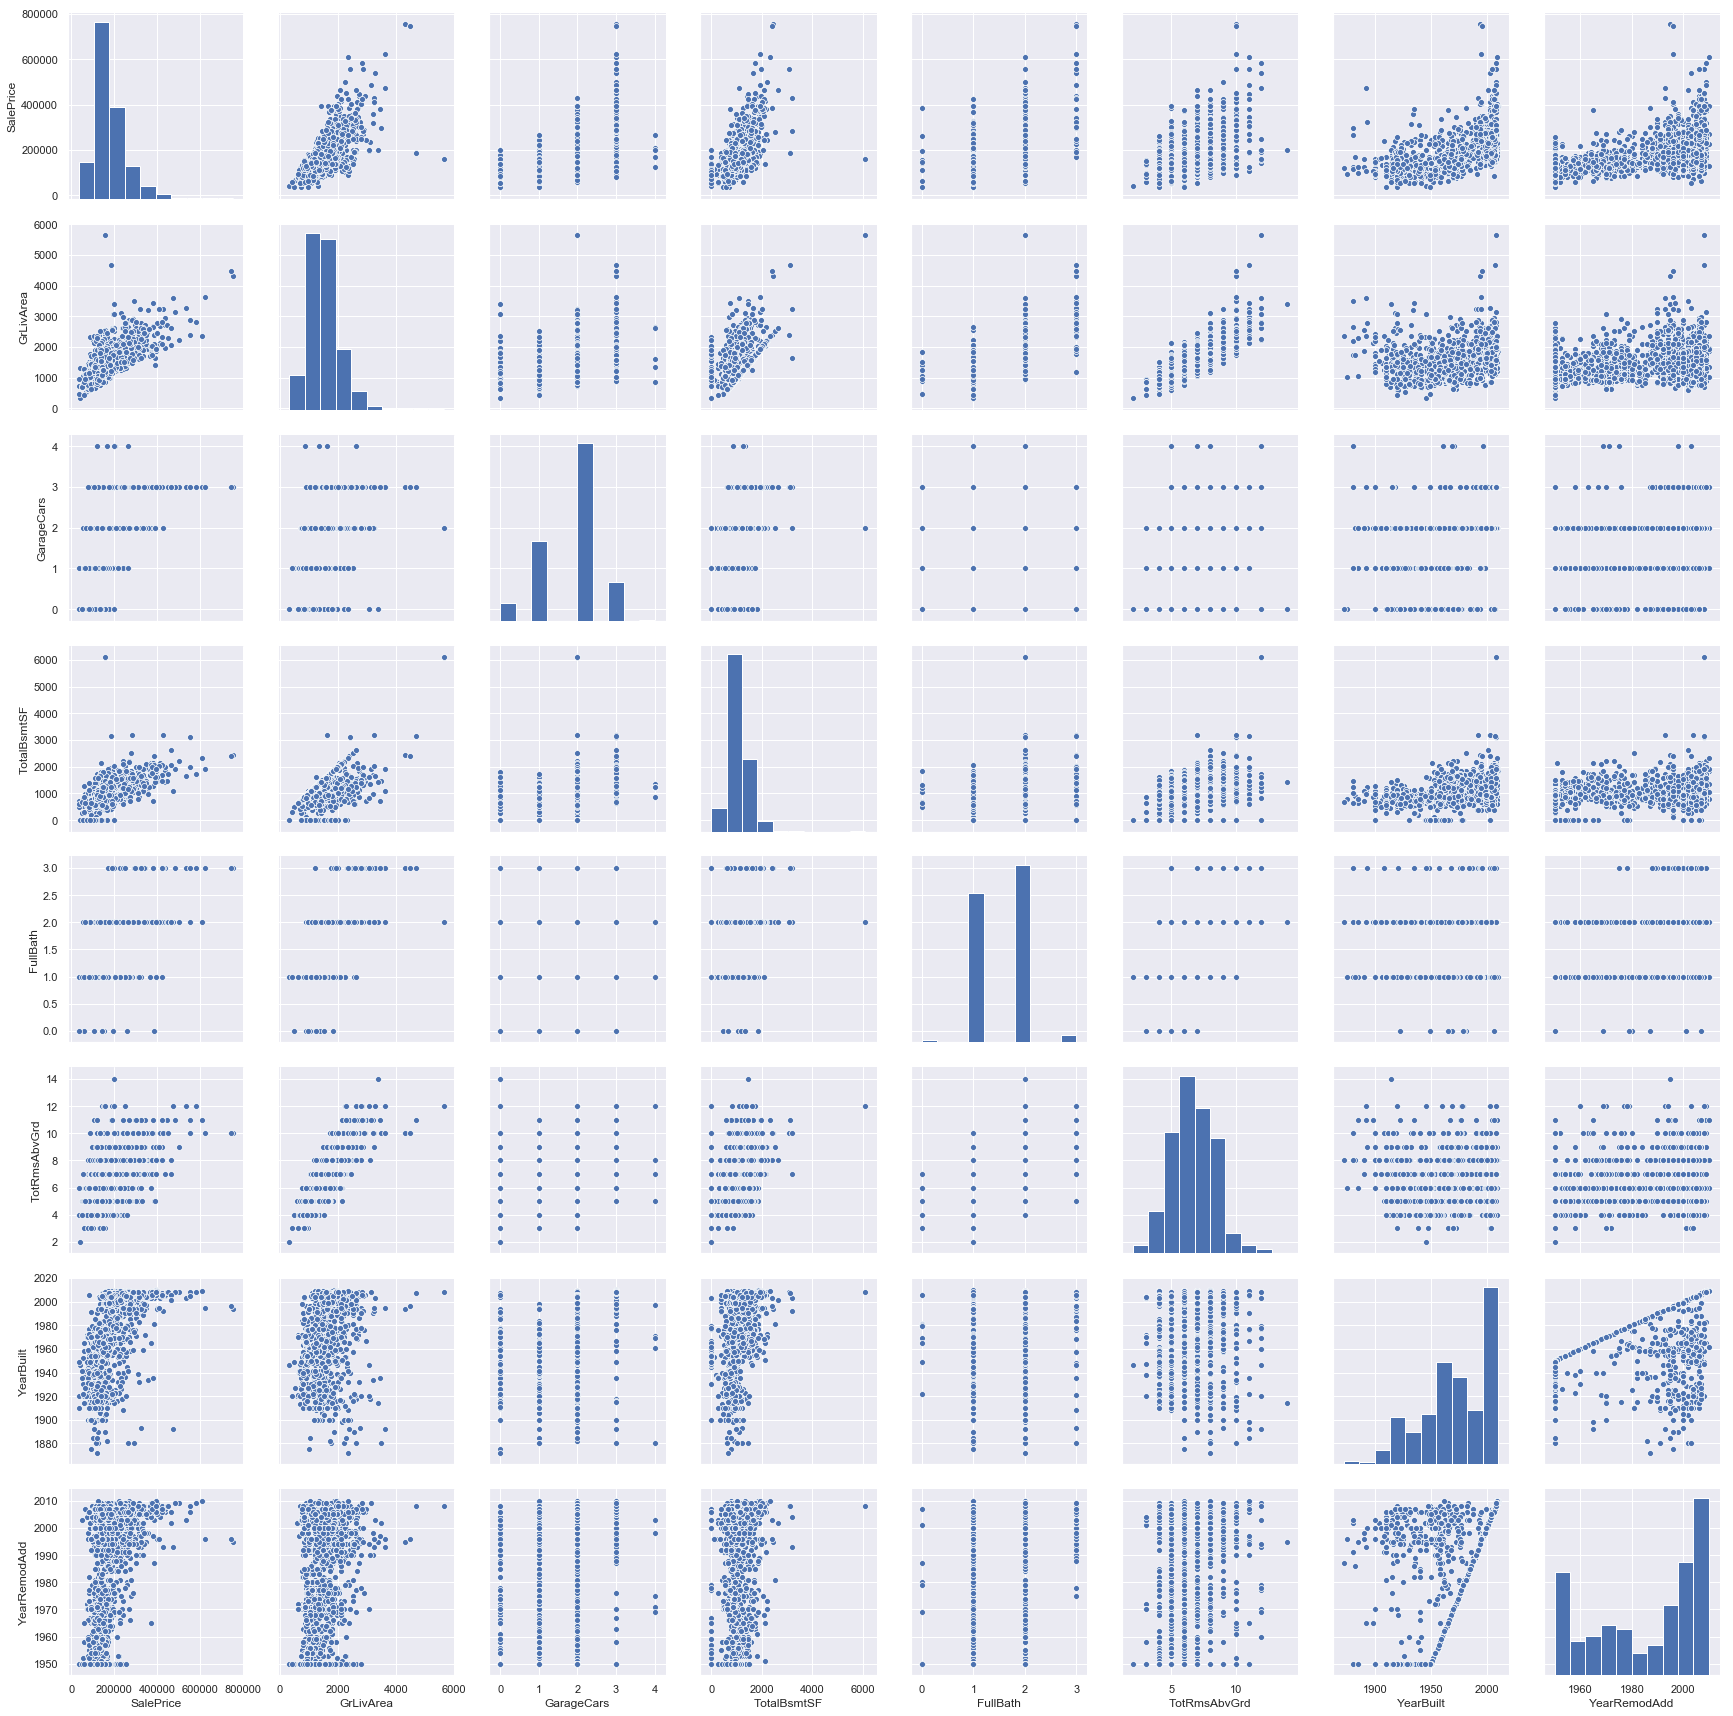

In [21]:

sns.set()
sns.pairplot(df_train[['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath','TotRmsAbvGrd', 'YearBuilt','YearRemodAdd']], size = 3)
plt.show();

In [25]:
ols =linear_model.LinearRegression()
## separate the input variables and output variables
X1 = df_train[['LotFrontage','LotArea']]  # input varialbe
Y1 = target  # output variable
ols.fit(X1, Y1)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X1, Y1)))


Intercept: 11.819427
Coefficients: [1.78559427e-03 9.67327733e-06]
R^2: 0.089980


In [27]:
ols =linear_model.LinearRegression()
## separate the input variables and output variables
X2 = df_train[['YearBuilt','YearRemodAdd',"YrSold"]] # input varialbe
Y1 = target  # output variable
ols.fit(X2, Y1)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X2, Y1)))


Intercept: 15.621827
Coefficients: [ 0.00509246  0.00655729 -0.01327399]
R^2: 0.419190


In [64]:
X=df_train.drop(["SalePrice","Id"],axis=1)
Y=target

In [65]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [66]:
lm=linear_model.LinearRegression()

In [68]:
model=lm.fit(X_train,y_train)

print("R^2: %f" %(lm.score(X, Y)))


R^2: 0.917648


In [76]:
prediction=model.predict(X_test)
print("RMSE is \n" ,mean_squared_error(y_test,prediction))

RMSE is 
 0.01918257946404695


In [32]:
#### Your code here
ols =linear_model.LinearRegression()
## separate the input variables and output variables
X3 = df_train[["BsmtFinSF1" ,"BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]] # input varialbe
Y1 = target  # output variable
ols.fit(X3, Y1)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X3, Y1)))


Intercept: 11.442787
Coefficients: [2.08056965e-04 2.01652941e-05 1.51842518e-04 3.80064776e-04]
R^2: 0.381216


In [80]:
ols =linear_model.LinearRegression()
X8=df_train[['1stFlrSF',
 '2ndFlrSF',
 'GrLivArea']]
Y1 = target  # output variable
ols.fit(X8, Y1)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X8, Y1)))


Intercept: 11.051043
Coefficients: [ 0.0011849   0.00089545 -0.000472  ]
R^2: 0.561818


In [81]:
ols =linear_model.LinearRegression()
X9=df_train[['BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath']]
Y1 = target  # output variable
ols.fit(X9, Y1)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X9, Y1)))



Intercept: 11.184015
Coefficients: [0.22497286 0.12204318 0.42365374 0.19399517]
R^2: 0.492866


In [9]:
continuous_features =  df_train[['BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath']]
scores = {}
ols2 = linear_model.LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df1_train    = df_train.copy()
                feature = df1_train[feature_name].copy()
                df1_train.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df1_train, feature)
                scores[feature_name] = ols2.score(df1_train, feature)   

Text(0.5, 1.0, '$R^2$ of a continuous feature against the other features')

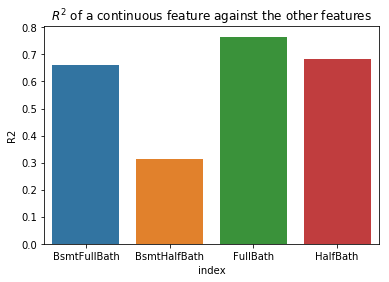

In [10]:
sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

In [24]:
continuous_features = df_train[["BsmtFinSF1" ,"BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]]
scores = {}
ols2 = linear_model.LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df1_train    = df_train.copy()
                feature = df1_train[feature_name].copy()
                df1_train.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df1_train, feature)
                scores[feature_name] = ols2.score(df1_train, feature)   

Text(0.5, 1.0, '$R^2$ of a continuous feature against the other features')

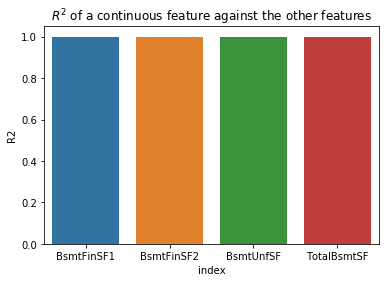

In [25]:
sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

In [36]:
continuous_features=df_train[['LotFrontage','LotArea','MasVnrArea', 'GrLivArea',"GarageArea",'1stFlrSF',
 '2ndFlrSF']]
scores = {}
ols2 = linear_model.LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df1_train    = df_train.copy()
                feature = df1_train[feature_name].copy()
                df1_train.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df1_train, feature)
                scores[feature_name] = ols2.score(df1_train, feature)   

Text(0.5, 1.0, '$R^2$ of a continuous feature against the other features')

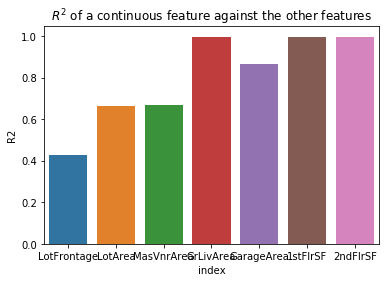

In [37]:
sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

In [38]:
continuous_features=df_train[['MoSold',"YrSold"]]
scores = {}
ols2 = linear_model.LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df1_train    = df_train.copy()
                feature = df1_train[feature_name].copy()
                df1_train.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df1_train, feature)
                scores[feature_name] = ols2.score(df1_train, feature)   

Text(0.5, 1.0, '$R^2$ of a continuous feature against the other features')

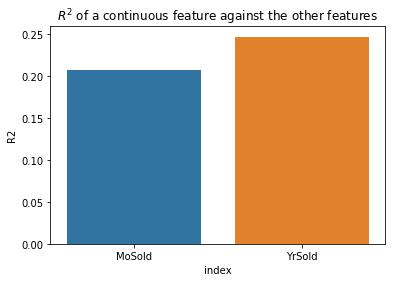

In [39]:
sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')